In [1]:
import numpy as np
import pandas as pd

def moving_average(d,extra_periods=1,n=3):
    
    # Setup input for the numpy array
    d = np.array(d) 
    # Historical sprint length
    cols = len(d) 
    # Append np.nan into the historical array to cover future sprints
    d = np.append(d,[np.nan]*extra_periods) 
    # Define the forecast array
    f = np.full(cols+extra_periods,np.nan)
    
    # Create all the t+1 forecast until end of historical sprint
    for t in range(n,cols+1):
        f[t] = np.mean(d[t-n:t])
     
    # Forecast for all extra sprints
    for t in range(cols+1,cols+extra_periods):
        # Update the forecast as the previous forecast
        f[t] = f[t-1]
               
    # Return a dataframe with the demand, forecast & error
    df = pd.DataFrame.from_dict({"Historical":d,"Forecast":f,"Error":d-f})
  
    return df


MAE: 23.02
RMSE: 29.34


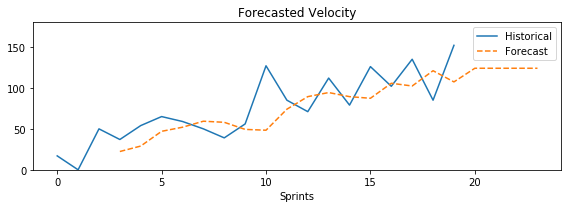

In [2]:
d=[17, 0, 50, 37, 54, 65, 59, 50, 39, 56, 127, 85, 71, 112, 79, 126, 102, 135, 85, 152]   
df = moving_average(d,extra_periods=4)
df.index.name = "Sprints"
df[["Historical","Forecast"]].plot(figsize=(8,3),title="Forecasted Velocity",ylim=(0,180),style=["-","--"])  
MAE = df["Error"].abs().mean()  
print("MAE:",round(MAE,2)) 
RMSE = np.sqrt((df["Error"]**2).mean())
print("RMSE:",round(RMSE,2))
import matplotlib.pyplot as plt 
plt.tight_layout()
plt.savefig("moving_average_example"+".pdf")